<a href="https://colab.research.google.com/github/rahiakela/computer-vision-research-and-practice/blob/main/hands-on-computer-vision-with-detectron2/04-detectron2-architecture/01_detectron2_architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Detectron2 architecture

The object detection model in Detectron2 is the implementation of Faster R-CNN. Specifically, this architecture includes the backbone network, the region proposal network, and the region of interest heads.

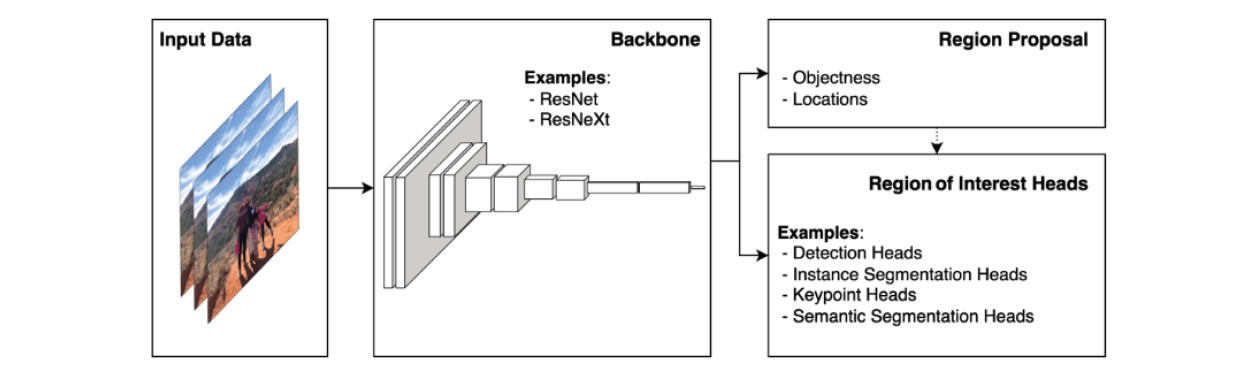

- The backbone network includes several convolutional layers that help to perform feature extraction from the input image.
- The region proposal network is another neural network that predicts the proposals with objectness and locations of the objects before feeding to the next stage.
- The region of interest heads have neural networks for object localization and classification.



##Setup

In [ ]:
!python -m pip install "git+https://github.com/facebookresearch/detectron2.git"

In [2]:
import detectron2
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

import torch
import cv2
from google.colab.patches import cv2_imshow

import numpy as np
import matplotlib.pyplot as plt

# Suppress some user warnings
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:
print(detectron2.__version__)

0.6


In [ ]:
!wget https://github.com/PacktPublishing/Hands-On-Computer-Vision-with-Detectron2/raw/main/datasets/800x800image/input.jpeg

In [5]:
def imshow(image):
  dpi = plt.rcParams["figure.dpi"]
  height, width = image.shape[:2]
  figsize = width / float(dpi), height / float(dpi)
  fig = plt.figure(figsize=figsize)
  plt.imshow(image)
  plt.imshow(image)
  plt.axis("off")
  plt.show()

##Pre-trained model

In [6]:
# Select a model
config_file_path = "COCO-Detection/faster_rcnn_R_50_C4_1x.yaml"
checkpoint_url = "COCO-Detection/faster_rcnn_R_50_C4_1x.yaml"
score_thresh_test = 0.95

# Create a configuration file
config = get_cfg()
config_file = model_zoo.get_config_file(config_file_path)
config.merge_from_file(config_file)

# Download weights
config.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(checkpoint_url)
config.MODEL.ROI_HEADS.SCORE_THRESH_TEST = score_thresh_test
predictor = DefaultPredictor(config)

model_final_721ade.pkl: 136MB [00:00, 220MB/s]                           


##Input image

In [7]:
img = cv2.imread("input.jpeg")
height, width = img.shape[:2]
image = torch.as_tensor(img.astype("float32").transpose(2, 0, 1))

In [8]:
image

tensor([[[199., 199., 199.,  ..., 203., 203., 203.],
         [199., 199., 199.,  ..., 203., 203., 203.],
         [199., 199., 199.,  ..., 204., 204., 204.],
         ...,
         [ 73.,  90.,  91.,  ...,  95.,  92.,  91.],
         [ 87.,  88.,  86.,  ...,  92.,  93.,  93.],
         [ 81.,  78.,  84.,  ...,  83.,  89.,  90.]],

        [[147., 147., 147.,  ..., 144., 144., 144.],
         [147., 147., 147.,  ..., 144., 144., 144.],
         [147., 147., 147.,  ..., 145., 145., 145.],
         ...,
         [114., 131., 133.,  ..., 137., 134., 133.],
         [131., 132., 130.,  ..., 133., 134., 134.],
         [125., 122., 128.,  ..., 124., 127., 128.]],

        [[106., 106., 106.,  ..., 104., 104., 104.],
         [106., 106., 106.,  ..., 104., 104., 104.],
         [106., 106., 106.,  ..., 105., 105., 105.],
         ...,
         [206., 223., 222.,  ..., 233., 230., 229.],
         [222., 223., 221.,  ..., 226., 227., 227.],
         [216., 213., 219.,  ..., 217., 221., 222.]]]

##Backbone network

In [9]:
backbone = predictor.model.backbone
type(backbone)

detectron2.modeling.backbone.resnet.ResNet

In [10]:
print(backbone)

ResNet(
  (stem): BasicStem(
    (conv1): Conv2d(
      3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
      (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
    )
  )
  (res2): Sequential(
    (0): BottleneckBlock(
      (shortcut): Conv2d(
        64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
        (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
      )
      (conv1): Conv2d(
        64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
        (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
      )
      (conv2): Conv2d(
        64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
        (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
      )
      (conv3): Conv2d(
        64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
        (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
      )
    )
    (1): BottleneckBlock(
      (conv1): Conv2d(
        256, 64, kernel_size=(1, 1), stride=(1, 1), bias=Fa

In [11]:
# let's passes the input image through the blocks of this backbone and tracks the output of each block
with torch.no_grad():
  # Input to ResNet is of the form (NxCxHxW)
  resnet_input = image.to("cuda").unsqueeze(0)  # load the image to GPU
  stem = backbone.stem(resnet_input)
  res2 = backbone.res2(stem)
  res3 = backbone.res3(res2)
  res4 = backbone.res4(res3)

  print(resnet_input.shape)
  print(stem.shape)
  print(res2.shape)
  print(res3.shape)
  print(res4.shape)

torch.Size([1, 3, 800, 800])
torch.Size([1, 64, 200, 200])
torch.Size([1, 256, 200, 200])
torch.Size([1, 512, 100, 100])
torch.Size([1, 1024, 50, 50])


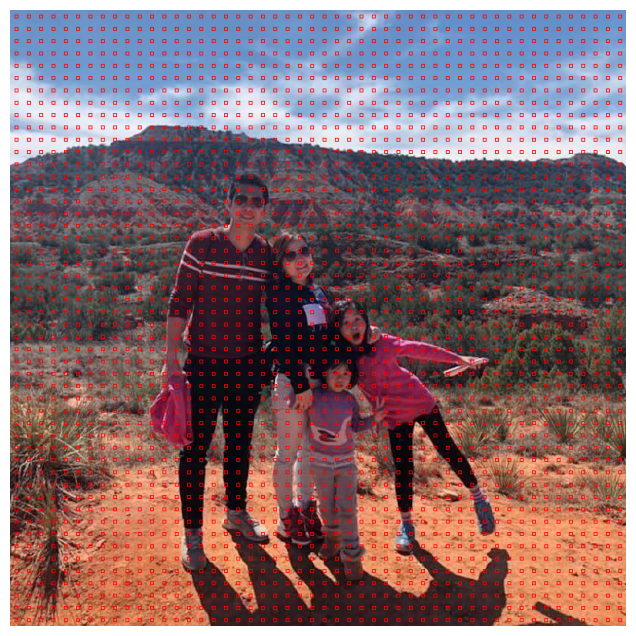

In [12]:
# let's draw the center points for the centers of 2,500 regions that correspond to the 50x50 extracted features
feature_h, feature_w = res4.shape[2:]
sub_sample = height / feature_h
new_img = img.copy()

# feature map points and corresponding regions
rect_w = 4
rect_h = 4
for i in range(feature_h):
  for j in range(feature_w):
    center_x = sub_sample * j + sub_sample / 2
    center_y = sub_sample * i + sub_sample / 2

    start_x = int(center_x - rect_w / 2)
    start_y = int(center_y - rect_h / 2)

    end_x = int(center_x + rect_w / 2)
    end_y = int(center_y + rect_h / 2)

    cv2.rectangle(new_img, (start_x, start_y), (end_x, end_y), (0, 0, 255))

imshow(new_img[:, :, ::-1])

Specifically, each point in the feature map is projected back to the corresponding point (and region)
in the original image.

For each of these projected points, there are a fixed number of raw anchors (bounding boxes with
different sizes and ratios) generated as the initial boxes for performing bounding box proposals using
the Region Proposal Network (RPN).

##Region Proposal Network

In [13]:
rpn = predictor.model.proposal_generator
type(rpn)

detectron2.modeling.proposal_generator.rpn.RPN

In [14]:
print(rpn)

RPN(
  (rpn_head): StandardRPNHead(
    (conv): Conv2d(
      1024, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)
      (activation): ReLU()
    )
    (objectness_logits): Conv2d(1024, 15, kernel_size=(1, 1), stride=(1, 1))
    (anchor_deltas): Conv2d(1024, 60, kernel_size=(1, 1), stride=(1, 1))
  )
  (anchor_generator): DefaultAnchorGenerator(
    (cell_anchors): BufferList()
  )
)


###Anchor generator

In [15]:
# the anchor generator takes inputs as anchors’ ratios and sizes, let's see it
print(config.MODEL.ANCHOR_GENERATOR.SIZES)
print(config.MODEL.ANCHOR_GENERATOR.ASPECT_RATIOS)

[[32, 64, 128, 256, 512]]
[[0.5, 1.0, 2.0]]


45 23
32 32
23 45
91 45
64 64
45 91
181 91
128 128
91 181
363 181
256 256
181 363
725 363
512 512
363 725


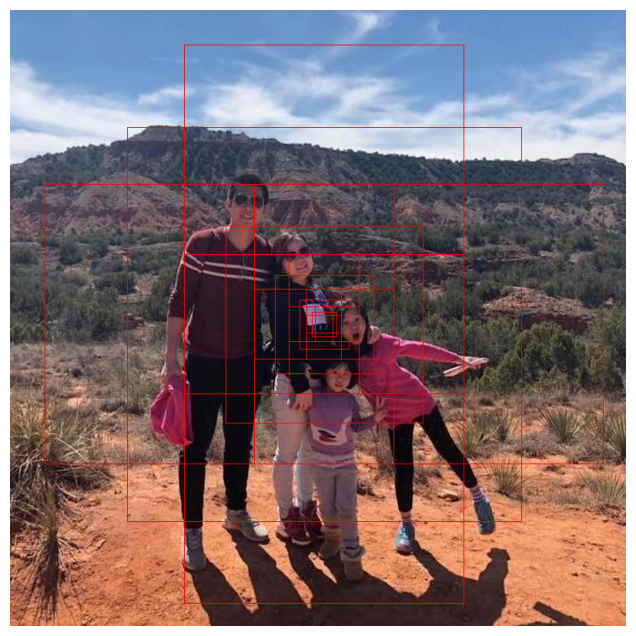

In [16]:
# let's visualize these anchors imposed on top of the original image for the middle point of the feature map
anchor_sizes = config.MODEL.ANCHOR_GENERATOR.SIZES
anchor_ratios = config.MODEL.ANCHOR_GENERATOR.ASPECT_RATIOS

new_img = img.copy()

for size in anchor_sizes[0]:
  for ratio in anchor_ratios[0]:
    anchor_h = size * np.sqrt(ratio)
    anchor_w = size / np.sqrt(ratio)

    center_x = sub_sample * feature_h / 2 + sub_sample / 2
    center_y = sub_sample * feature_w / 2 + sub_sample / 2

    x0 = int(center_x - anchor_w / 2)
    y0 = int(center_y - anchor_h / 2)

    x1 = int(center_x + anchor_w / 2)
    y1 = int(center_y + anchor_h / 2)

    print(x1 - x0, y1 - y0)
    cv2.rectangle(new_img, (x0, y0), (x1, y1), (0, 0, 255))

imshow(new_img[:, :, ::-1])

In [17]:
# let's inspect how Detectron2 generates these anchors
anchors = rpn.anchor_generator([res4])
# there are 37,500 anchors, each with 4 location specifications (x0, y0, x1, y1)
print(anchors[0].tensor.shape)

torch.Size([37500, 4])


45 23
32 32
23 45
91 45
64 64
45 91
181 91
128 128
91 181
363 181
256 256
181 363
725 363
512 512
363 725


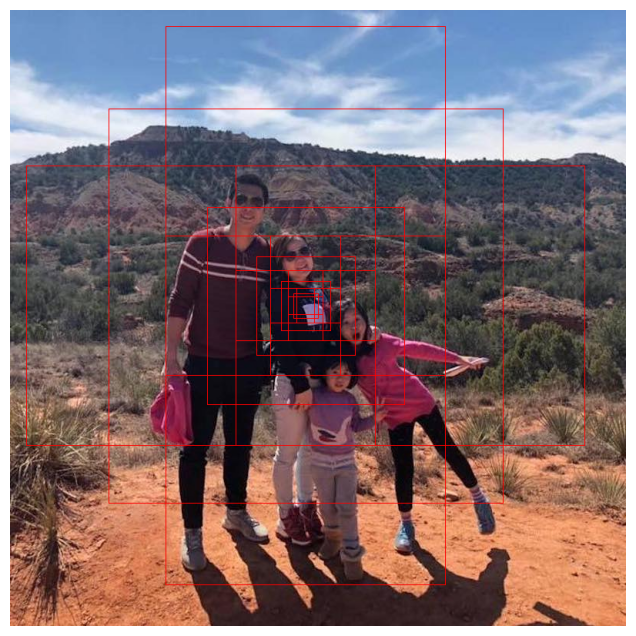

In [18]:
# let's takes the 15 anchors for the middle point of the image and displays it to the original input
new_img = img.copy()

col_idx = 24
row_idx = 24
start_box = (row_idx * 50 + col_idx) * 15
for i in range(start_box, start_box + 15):
  anchors_np = anchors[0].tensor[i].to("cpu").numpy()
  x0, y0, x1, y1 = [int(v) for v in anchors_np]
  print(x1 - x0, y1 - y0)
  cv2.rectangle(new_img, (x0, y0), (x1, y1), (0, 0, 255))

imshow(new_img[:, :, ::-1])

###RPN head

In [20]:
rpn.rpn_head

StandardRPNHead(
  (conv): Conv2d(
    1024, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)
    (activation): ReLU()
  )
  (objectness_logits): Conv2d(1024, 15, kernel_size=(1, 1), stride=(1, 1))
  (anchor_deltas): Conv2d(1024, 60, kernel_size=(1, 1), stride=(1, 1))
)

In [19]:
pred_objectness_logits, pred_anchor_deltas = rpn.rpn_head(res4)

print(pred_objectness_logits[0].shape)
print(pred_anchor_deltas[0].shape)

torch.Size([15, 50, 50])
torch.Size([60, 50, 50])


###RPN loss